# Hyperspectral image color transfer with $ MGW_2 $ 

This notebook shows how to transfer colors from an RGB image to an hyperspectral image using $ MGW_2 $. 


In [31]:
import tifffile as tiff
from MGW.mgw2 import MGW2_coup
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

First, lets load an hyperspectral image and visualize its first channel as a grayscale image.

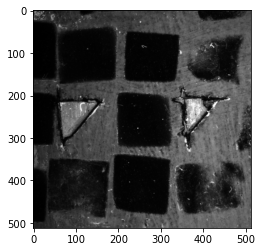

In [32]:
img = tiff.imread('images/stack_10s.tif')
img = resize(img,(15,512,512))
img_size = 512
img = np.swapaxes(img,0,-1)


plt.imshow(img[:,:,0],cmap='gray')
plt.show()

Now, lets load a RGB image that we will use as a color palette.

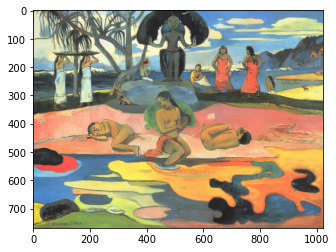

In [33]:
im2 = plt.imread('images/gauguin.jpg')
#im2 = plt.imread('images/renoir.jpg')
im2 = im2/np.max(im2)


plt.imshow(im2)
plt.show()


We then treat the images as vectors by stacking their columns, then we derive a mapping between the two vectors using $ MGW_2 $.

In [35]:
img_flat = np.vstack(img)
im2_flat = np.vstack(im2)

n_components = 15

Y = MGW2_coup(img_flat,
              im2_flat,
              n_components=n_components,
              method='T_mean',
              points=False,
              verbose=True)
            


fitting mixture 1
fitting mixture 2
deriving coupling between GMMs
deriving map from coupling


Finally, we reconstruct an RGB image from the obtained vector.

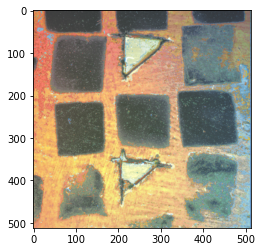

In [36]:
img_rgb = np.array(np.vsplit(Y,img_size))
rgb_img = np.clip((255*np.swapaxes(img_rgb.reshape((img_size,img_size,3)),0,1)),0.,255.).astype(np.uint8)

plt.imshow(rgb_img)
plt.show()

# rgb_img.save("rgb_img.png")